# Model Evaluation


## Imports & Setup
This notebook imports all necessary libraries and modules using `from utils.imports import *`, which centralizes all dependencies required for model evaluation. See `utils/imports.py` for full details.


In [ ]:
# Imports from utils/imports.py
from utils.imports import pd, np, accuracy_score, classification_report, confusion_matrix, plt, sns

### SVM

In [ ]:
# This step is to store the prediction results alongside the original data for subsequent evaluation metrics and visualizations.
# Gets the original indices of the test set from before the TF-IDF transformation else the X-text and y_pred will have uneven no of rows
test_indices = y_test.reset_index().index  # y_test still has the original indices

# Ensures that predictions are added to the right rows in df3 using the original indices
df3.loc[test_indices, 'y_pred_svm'] = y_pred_svm

# Verify by printing the first few rows of df3
print(df3.head())

                                             Payload  SQLInjection  XSS  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...             1    0   
1  -5420'   union all select 2508 2508 2508 2508 ...             1    0   
2  -2857%'       union all select 7167 7167 7167 ...             1    0   
3  ssssssssssssssssssssssssssssssssssssssssssssss...             1    0   
4  j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68axy...             1    0   

   Normal                                     Payload_Tokens  \
0       0  [ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1i...   
1       0  [-5420, ', union, all, select, 2508, 2508, 250...   
2       0  [-2857, %, ', union, all, select, 7167, 7167, ...   
3       0  [sssssssssssssssssssssssssssssssssssssssssssss...   
4       0  [j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68ax...   

                                     Payload_Cleaned  Payload_Length  Label  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...              18      0   
1  -54

In [ ]:
# Evaluate the Model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
report = classification_report(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Adding the accuracy to the dictionary:
model_accuracy['Support vector machine'] = np.around(svm_accuracy*100, 2)

print(f"SVM Accuracy: {svm_accuracy}")
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)



SVM Accuracy: 0.9738745980707395
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       847
           1       1.00      1.00      1.00       836
           2       0.95      0.97      0.96       805

    accuracy                           0.97      2488
   macro avg       0.97      0.97      0.97      2488
weighted avg       0.97      0.97      0.97      2488

Confusion Matrix:
[[806   0  41]
 [  1 834   1]
 [ 21   1 783]]


In [ ]:
# Check the number of rows in X_test
num_rows_X_test = X_test.shape[0]
print(f"Number of rows in X_test: {num_rows_X_test}")


Number of rows in X_test: 2488


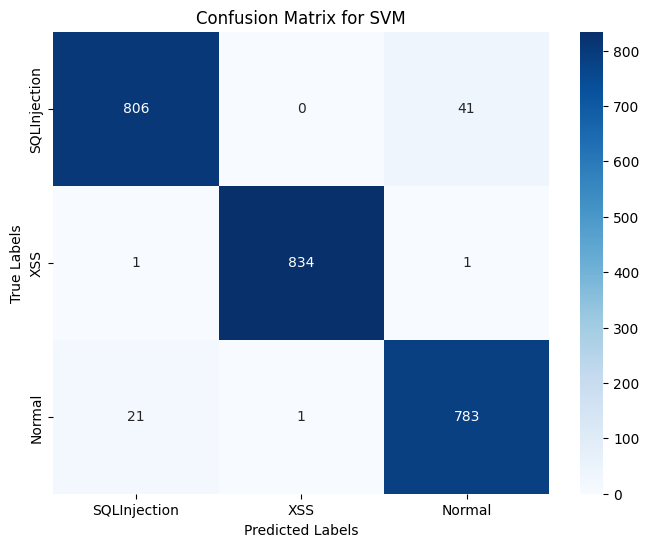

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['SQLInjection', 'XSS', 'Normal'],
            yticklabels=['SQLInjection', 'XSS', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()

### Random Forest

In [ ]:
#### Gets the original indices of the test set from before the TF-IDF transformation
# else the X-text and y_pred will have uneven no of rows
test_indices = y_test.reset_index().index  # y_test still has the original indices

# Ensures that predictions are added to the right rows in df3 using the original indices
df3.loc[test_indices, 'y_pred_rf'] = y_pred_rf

# Verify by printing the first few rows of df3
print(df3.head())

                                             Payload  SQLInjection  XSS  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...             1    0   
1  -5420'   union all select 2508 2508 2508 2508 ...             1    0   
2  -2857%'       union all select 7167 7167 7167 ...             1    0   
3  ssssssssssssssssssssssssssssssssssssssssssssss...             1    0   
4  j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68axy...             1    0   

   Normal                                     Payload_Tokens  \
0       0  [ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1i...   
1       0  [-5420, ', union, all, select, 2508, 2508, 250...   
2       0  [-2857, %, ', union, all, select, 7167, 7167, ...   
3       0  [sssssssssssssssssssssssssssssssssssssssssssss...   
4       0  [j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68ax...   

                                     Payload_Cleaned  Payload_Length  Label  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...              18      0   
1  -54

In [ ]:
# Evaluate the Model
rf_accuracy = accuracy_score(y_test, y_pred_rf)     # comparing y_pred_rf (ie predicted label/target) with the y_test actual data
report = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Adding the accuracy to the dictionary:
model_accuracy['Random Forest'] = np.around(rf_accuracy*100, 2)

print(f"RF Accuracy: {rf_accuracy:}")
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

RF Accuracy: 0.9738745980707395
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       847
           1       1.00      1.00      1.00       836
           2       0.96      0.96      0.96       805

    accuracy                           0.97      2488
   macro avg       0.97      0.97      0.97      2488
weighted avg       0.97      0.97      0.97      2488

Confusion Matrix:
[[811   0  36]
 [  0 836   0]
 [ 28   1 776]]


### Logistic Regression

In [ ]:
# Gets the original indices of the test set from before the TF-IDF transformation
# else the X-text and y_pred will have uneven no of rows
test_indices = y_test.reset_index().index  # y_test still has the original indices

# Ensures that predictions are added to the right rows in df3 using the original indices
df3.loc[test_indices, 'y_pred_lr'] = y_pred_lr

# Verify by printing the first few rows of df3
print(df3.head())

                                             Payload  SQLInjection  XSS  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...             1    0   
1  -5420'   union all select 2508 2508 2508 2508 ...             1    0   
2  -2857%'       union all select 7167 7167 7167 ...             1    0   
3  ssssssssssssssssssssssssssssssssssssssssssssss...             1    0   
4  j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68axy...             1    0   

   Normal                                     Payload_Tokens  \
0       0  [ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1i...   
1       0  [-5420, ', union, all, select, 2508, 2508, 250...   
2       0  [-2857, %, ', union, all, select, 7167, 7167, ...   
3       0  [sssssssssssssssssssssssssssssssssssssssssssss...   
4       0  [j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68ax...   

                                     Payload_Cleaned  Payload_Length  Label  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...              18      0   
1  -54

In [ ]:
# Evaluate the Model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
report = classification_report(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Adding the accuracy to the dictionary:
model_accuracy['Logistic Regression'] = np.around(lr_accuracy*100, 2)

print(f"Logistic Regression Accuracy: {lr_accuracy:}")
print("Classification Report:", classification_report(y_test, y_pred_lr))
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Logistic Regression Accuracy: 0.9738745980707395
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.94      0.96       847
           1       1.00      1.00      1.00       836
           2       0.94      0.99      0.96       805

    accuracy                           0.97      2488
   macro avg       0.97      0.97      0.97      2488
weighted avg       0.97      0.97      0.97      2488

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       847
           1       1.00      1.00      1.00       836
           2       0.94      0.99      0.96       805

    accuracy                           0.97      2488
   macro avg       0.97      0.97      0.97      2488
weighted avg       0.97      0.97      0.97      2488

Confusion Matrix:
[[796   1  50]
 [  1 834   1]
 [ 11   1 793]]


### Gradient Boosting

In [ ]:
# Gets the original indices of the test set from before the TF-IDF transformation
# else the X-text and y_pred will have uneven no of rows
test_indices = y_test.reset_index().index  # y_test still has the original indices

# Ensures that predictions are added to the right rows in df3 using the original indices
df3.loc[test_indices, 'y_pred_gb'] = y_pred_gb

# Verify by printing the first few rows of df3
print(df3.head())

                                             Payload  SQLInjection  XSS  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...             1    0   
1  -5420'   union all select 2508 2508 2508 2508 ...             1    0   
2  -2857%'       union all select 7167 7167 7167 ...             1    0   
3  ssssssssssssssssssssssssssssssssssssssssssssss...             1    0   
4  j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68axy...             1    0   

   Normal                                     Payload_Tokens  \
0       0  [ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1i...   
1       0  [-5420, ', union, all, select, 2508, 2508, 250...   
2       0  [-2857, %, ', union, all, select, 7167, 7167, ...   
3       0  [sssssssssssssssssssssssssssssssssssssssssssss...   
4       0  [j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68ax...   

                                     Payload_Cleaned  Payload_Length  Label  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...              18      0   
1  -54

In [ ]:
# Evaluate the Model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
report = classification_report(y_test, y_pred_gb)
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Adding the accuracy to the dictionary:
model_accuracy['Gradient Boosting'] = np.around(gb_accuracy*100, 2)

print(f"Gradient Boosting Accuracy: {gb_accuracy:}")
print("Classification Report:", classification_report(y_test, y_pred_gb))
print(report)
print('Confusion Matrix:')
print(conf_matrix)


Gradient Boosting Accuracy: 0.952572347266881
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.87      0.93       847
           1       1.00      1.00      1.00       836
           2       0.88      1.00      0.93       805

    accuracy                           0.95      2488
   macro avg       0.96      0.95      0.95      2488
weighted avg       0.96      0.95      0.95      2488

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       847
           1       1.00      1.00      1.00       836
           2       0.88      1.00      0.93       805

    accuracy                           0.95      2488
   macro avg       0.96      0.95      0.95      2488
weighted avg       0.96      0.95      0.95      2488

Confusion Matrix:
[[734   1 112]
 [  0 834   2]
 [  1   2 802]]


### Multi-layer Perceptron (MLP) Neural Network

In [ ]:
# Gets the original indices of the test set from before the TF-IDF transformation
# else the X-text and y_pred will have uneven no of rows
test_indices = y_test.reset_index().index  # y_test still has the original indices

# Ensures that predictions are added to the right rows in df3 using the original indices
df3.loc[test_indices, 'y_pred_nn'] = y_pred_nn

# Verify by printing the first few rows of df3
print(df3.head())

                                             Payload  SQLInjection  XSS  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...             1    0   
1  -5420'   union all select 2508 2508 2508 2508 ...             1    0   
2  -2857%'       union all select 7167 7167 7167 ...             1    0   
3  ssssssssssssssssssssssssssssssssssssssssssssss...             1    0   
4  j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68axy...             1    0   

   Normal                                     Payload_Tokens  \
0       0  [ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1i...   
1       0  [-5420, ', union, all, select, 2508, 2508, 250...   
2       0  [-2857, %, ', union, all, select, 7167, 7167, ...   
3       0  [sssssssssssssssssssssssssssssssssssssssssssss...   
4       0  [j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68ax...   

                                     Payload_Cleaned  Payload_Length  Label  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...              18      0   
1  -54

In [ ]:
# Evaluate the Model
nn_accuracy = accuracy_score(y_test, y_pred_nn)
report = classification_report(y_test, y_pred_nn)
conf_matrix = confusion_matrix(y_test, y_pred_nn)

# Adding the accuracy to the dictionary:
model_accuracy['MLP Neural Network'] = np.around(nn_accuracy*100, 2)

print(f"MLP Neural Network Accuracy: {nn_accuracy:}")
print("MLP Neural Network:", classification_report(y_test, y_pred_nn))
print(report)
print('Confusion Matrix:')
print(conf_matrix)

MLP Neural Network Accuracy: 0.9706591639871383
MLP Neural Network:               precision    recall  f1-score   support

           0       0.96      0.96      0.96       847
           1       1.00      1.00      1.00       836
           2       0.96      0.95      0.95       805

    accuracy                           0.97      2488
   macro avg       0.97      0.97      0.97      2488
weighted avg       0.97      0.97      0.97      2488

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       847
           1       1.00      1.00      1.00       836
           2       0.96      0.95      0.95       805

    accuracy                           0.97      2488
   macro avg       0.97      0.97      0.97      2488
weighted avg       0.97      0.97      0.97      2488

Confusion Matrix:
[[813   0  34]
 [  0 836   0]
 [ 38   1 766]]


### Extra Trees (Extremely Randomized Trees)

In [ ]:
#### Gets the original indices of the test set from before the TF-IDF transformation
# else the X-text and y_pred will have uneven no of rows
test_indices = y_test.reset_index().index  # y_test still has the original indices

# Ensures that predictions are added to the right rows in df3 using the original indices
df3.loc[test_indices, 'y_pred_et'] = y_pred_et

# Verify by printing the first few rows of df3
print(df3.head())

                                             Payload  SQLInjection  XSS  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...             1    0   
1  -5420'   union all select 2508 2508 2508 2508 ...             1    0   
2  -2857%'       union all select 7167 7167 7167 ...             1    0   
3  ssssssssssssssssssssssssssssssssssssssssssssss...             1    0   
4  j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68axy...             1    0   

   Normal                                     Payload_Tokens  \
0       0  [ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1i...   
1       0  [-5420, ', union, all, select, 2508, 2508, 250...   
2       0  [-2857, %, ', union, all, select, 7167, 7167, ...   
3       0  [sssssssssssssssssssssssssssssssssssssssssssss...   
4       0  [j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68ax...   

                                     Payload_Cleaned  Payload_Length  Label  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...              18      0   
1  -54

In [ ]:
# Evaluate the Model
et_accuracy = accuracy_score(y_test, y_pred_et)
# Adding the accuracy to the dictionary:
model_accuracy['Extra Trees'] = np.around(et_accuracy*100, 2)

print(f"Extra Trees: {et_accuracy:}")
print("Extra Trees:", classification_report(y_test, y_pred_et))
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Extra Trees: 0.9742765273311897
Extra Trees:               precision    recall  f1-score   support

           0       0.98      0.95      0.96       847
           1       1.00      1.00      1.00       836
           2       0.95      0.98      0.96       805

    accuracy                           0.97      2488
   macro avg       0.97      0.97      0.97      2488
weighted avg       0.97      0.97      0.97      2488

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       847
           1       1.00      1.00      1.00       836
           2       0.96      0.95      0.95       805

    accuracy                           0.97      2488
   macro avg       0.97      0.97      0.97      2488
weighted avg       0.97      0.97      0.97      2488

Confusion Matrix:
[[813   0  34]
 [  0 836   0]
 [ 38   1 766]]


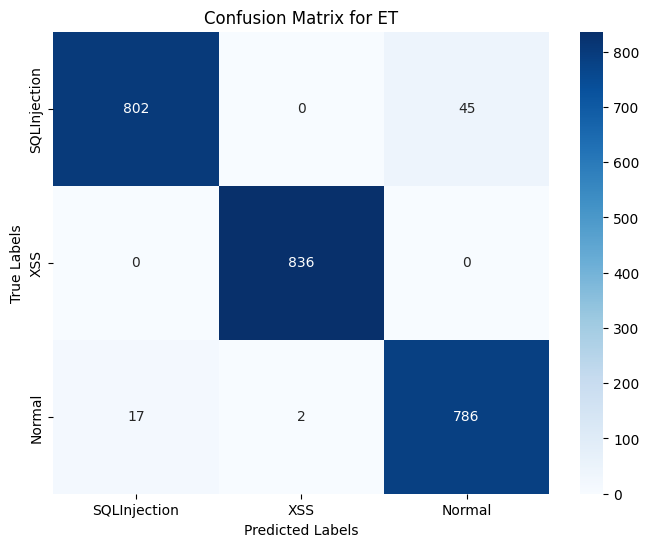

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_et)

# Step 2: Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['SQLInjection', 'XSS', 'Normal'],
            yticklabels=['SQLInjection', 'XSS', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for ET')
plt.show()

#### Model Accuracy Summary

In [ ]:
# To view the accuracy of the models together
model_accuracy

# To view the accuracy of the models together rounded up to whole numbers
# print("Model Accuracies:")
# for model_name, accuracy in model_accuracy.items():
# print(f"{model_name}: {round(accuracy *1)}%")

{'Support vector machine': 97.39,
 'Random Forest': 97.39,
 'Logistic Regression': 97.39,
 'Gradient Boosting': 95.26,
 'MLP Neural Network': 97.07,
 'Extra Trees': 97.43}

### Stack Ensemble for Stacker6X

In [ ]:
# Branding the model (modular ensemble model, with architecture - (ie with base models, meta-model) and why it was chosen.)
# StackerX6 is a stacking ensemble that combines six powerful classifiers (SVM, Logistic Regression, Neural Networks, Random Forest, Extra Trees,
# and Gradient Boosting) with a Random Forest as the meta-model. It is designed for robust performance on tabular data for classification tasks.
# It is a fusion of six models into a stacking ensemble, leveraging the strength of diverse classifiers.

class Stacker6X:
    """
    Stacker6X: A custom stacking ensemble model.

    Base Models:
        - Logistic Regression (LR)
        - Neural Networks (NN)
        - Random Forest (RF)
        - Extra Trees (ET)
        - Gradient Boosting (GB)

    Meta-Model:
        - Reused SVM (97% Accuracy)
    """

    def __init__(self, lr_model, nn_model, rf_model, et_model, gb_model, svm_model):
        self.svm_model = None  # Exclude SVM as a base model
        self.lr_model = lr_model
        self.nn_model = nn_model
        self.rf_model = rf_model
        self.et_model = et_model
        self.gb_model = gb_model
        self.meta_model = svm_model  # Reuse the trained SVM as the meta-model

    def fit(self, X_train, y_train):
        """
        Trains the meta-model using predictions from the base models.
        """
        # Generate probabilities from base models
        lr_probs = self.lr_model.predict_proba(X_train)
        nn_probs = self.nn_model.predict_proba(X_train)
        rf_base_probs = self.rf_model.predict_proba(X_train)
        et_probs = self.et_model.predict_proba(X_train)
        gb_probs = self.gb_model.predict_proba(X_train)

        # Combine probabilities into a single feature set
        stacked_features_train = np.hstack([lr_probs, nn_probs, rf_base_probs, et_probs, gb_probs])

        # Train the meta-model (already trained SVM is reused here)
        self.meta_model.fit(stacked_features_train, y_train)

    def predict(self, X_test):
        """
        Makes predictions using the stacking ensemble.
        """
        # Generate probabilities from base models
        lr_probs = self.lr_model.predict_proba(X_test)
        nn_probs = self.nn_model.predict_proba(X_test)
        rf_base_probs = self.rf_model.predict_proba(X_test)
        et_probs = self.et_model.predict_proba(X_test)
        gb_probs = self.gb_model.predict_proba(X_test)

        # Combine probabilities into a single feature set
        stacked_features_test = np.hstack([lr_probs, nn_probs, rf_base_probs, et_probs, gb_probs])

        # Predict with the meta-model (trained SVM)
        return self.meta_model.predict(stacked_features_test)

    def evaluate(self, X_test, y_test):
        """
        Evaluates the model's performance.
        """
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        return accuracy, report

## Model Initialization and Training - Stacker6X

In [ ]:
# Example usage of Stacker6X (always initialize Stacker6X package to fusion_model here
# Initializing Stacker6X with pre-trained models
# Initialize the model with the pre-trained base models and meta-model
fusion_model = Stacker6X(lr_model, nn_model, rf_model, et_model, gb_model, svm_model)

# Train the model
fusion_model.fit(X_train, y_train)

## Stacker6X Model Evaluation and Output

In [ ]:
# Evaluate the model
accuracy, report = fusion_model.evaluate(X_test, y_test)

# Output the results
print(f"Stacker6X Accuracy: {accuracy:}")
print("\nClassification Report:\n", report)


Stacker6X Accuracy: 0.97508038585209

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       847
           1       1.00      1.00      1.00       836
           2       0.95      0.97      0.96       805

    accuracy                           0.98      2488
   macro avg       0.97      0.98      0.97      2488
weighted avg       0.98      0.98      0.98      2488

